In [1]:
import numpy as np
from matplotlib import pyplot as plt

# schemes = ['ost_2', 'ost_3', 'ost_4', 'ost_5', 'ost_6']
# schemes = ['bppn_50', 'bppn_100', 'bppn_150', 'bppn_200', 'bppn_250']
# schemes = ['bppn_10', 'bppn_20', 'bppn_30', 'bppn_40', 'bppn_50']
schemes = ['mss_512', 'mss_1024', 'mss_2048']
schemes = ['new_schedule','new_schedule2', 'new_schedule3', 'old_schedule']
workloads = ["W5_0.1", "W5_0.25", "W5_0.5", "W5_0.75", "W5_1"]
# workloads = ["W5_1"]
labels = ["10", "25", "50", "75", "100"]
metrics = ['FCT', 'GOODPUT']

# labels = ['10', '25', '50', '75', '100']
# labels = ['2', '3', '4', '5', '6']

my_figsize = [15, 10]
my_fontsize = 30
WIDTH = 0.05  # the width of the bars
SHORT = 10000 # 100KB
LONG = 100000 # 1MB

data = {}
for scheme in schemes:
    data[scheme] = {}
    for workload in workloads:
        data[scheme][workload] = {}

for scheme in schemes:
    for workload in workloads:
        for metric in metrics:
            file_name = "../DATA/Zeropod/{scheme}/mss_512/DATA_zeropod_{workload}/{metric}.txt".format(scheme=scheme, workload=workload, metric=metric)
            data[scheme][workload][metric] = np.loadtxt(file_name)

for scheme in schemes:
        for workload in workloads:
            data[scheme][workload]['SHORT_IDX'] = data[scheme][workload]['FCT'][:, 4] < SHORT
            data[scheme][workload]['LONG_IDX'] = data[scheme][workload]['FCT'][:, 4] > LONG
            data[scheme][workload]['MIDDLE_IDX'] = (data[scheme][workload]['FCT'][:, 4] >= SHORT) * (data[scheme][workload]['FCT'][:, 4] <= LONG)
            data[scheme][workload]['singlepod'] = np.trunc(data[scheme][workload]['FCT'][:,2] / 16) == np.trunc(data[scheme][workload]['FCT'][:,3] / 16)
            data[scheme][workload]['multipods'] = np.trunc(data[scheme][workload]['FCT'][:,2] / 16) != np.trunc(data[scheme][workload]['FCT'][:,3] / 16)




In [2]:
print(np.sum(data["old_schedule"]["W5_1"]["SHORT_IDX"]))
print(np.sum(data["old_schedule"]["W5_1"]["MIDDLE_IDX"]))
print(np.sum(data["old_schedule"]["W5_1"]["LONG_IDX"]))
print(np.sum(data["old_schedule"]["W5_1"]["multipods"]))

15033
39276
45691
19994


{'new_schedule': [0.00310386083430693, 0.007754575267428954, 0.015424421209977019, 0.022210606786320114, 0.024340856945342233], 'new_schedule2': [0.003103841123963346, 0.007754086140143939, 0.015417860037727295, 0.02167788573737796, 0.023048767005303943], 'new_schedule3': [0.003103875852333615, 0.007753893279696552, 0.015414469349068944, 0.019905865028150303, 0.01955788733250495], 'old_schedule': [0.0031038579546239383, 0.007754054262686137, 0.015423565573509223, 0.022516870112333165, 0.025196735623858157]}
{'new_schedule': [0.07367936668271705, 0.18408049270607052, 0.36616802519553904, 0.5271417681452399, 0.5775112185240796], 'new_schedule2': [0.07367889031814598, 0.18406918490921664, 0.36600340798350517, 0.5146676240549302, 0.5469913433045746], 'new_schedule3': [0.07367967085998763, 0.18406279515248136, 0.36589974256381974, 0.47249276724449735, 0.4642322837441565], 'old_schedule': [0.07367936924579521, 0.18406868433134382, 0.3661573005360327, 0.5345821428526517, 0.5982869986879868]}


<Figure size 640x480 with 0 Axes>

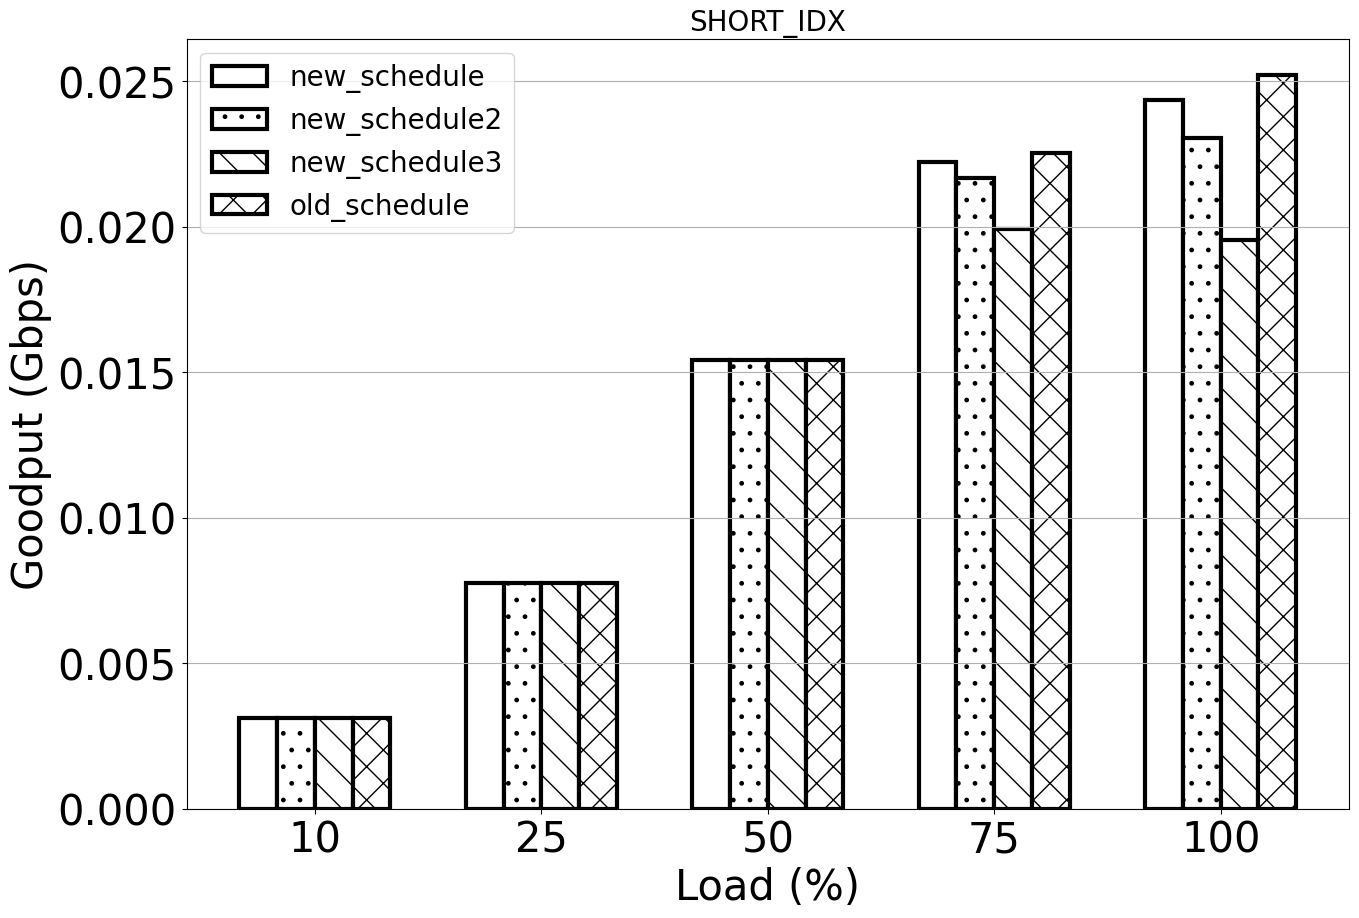

<Figure size 640x480 with 0 Axes>

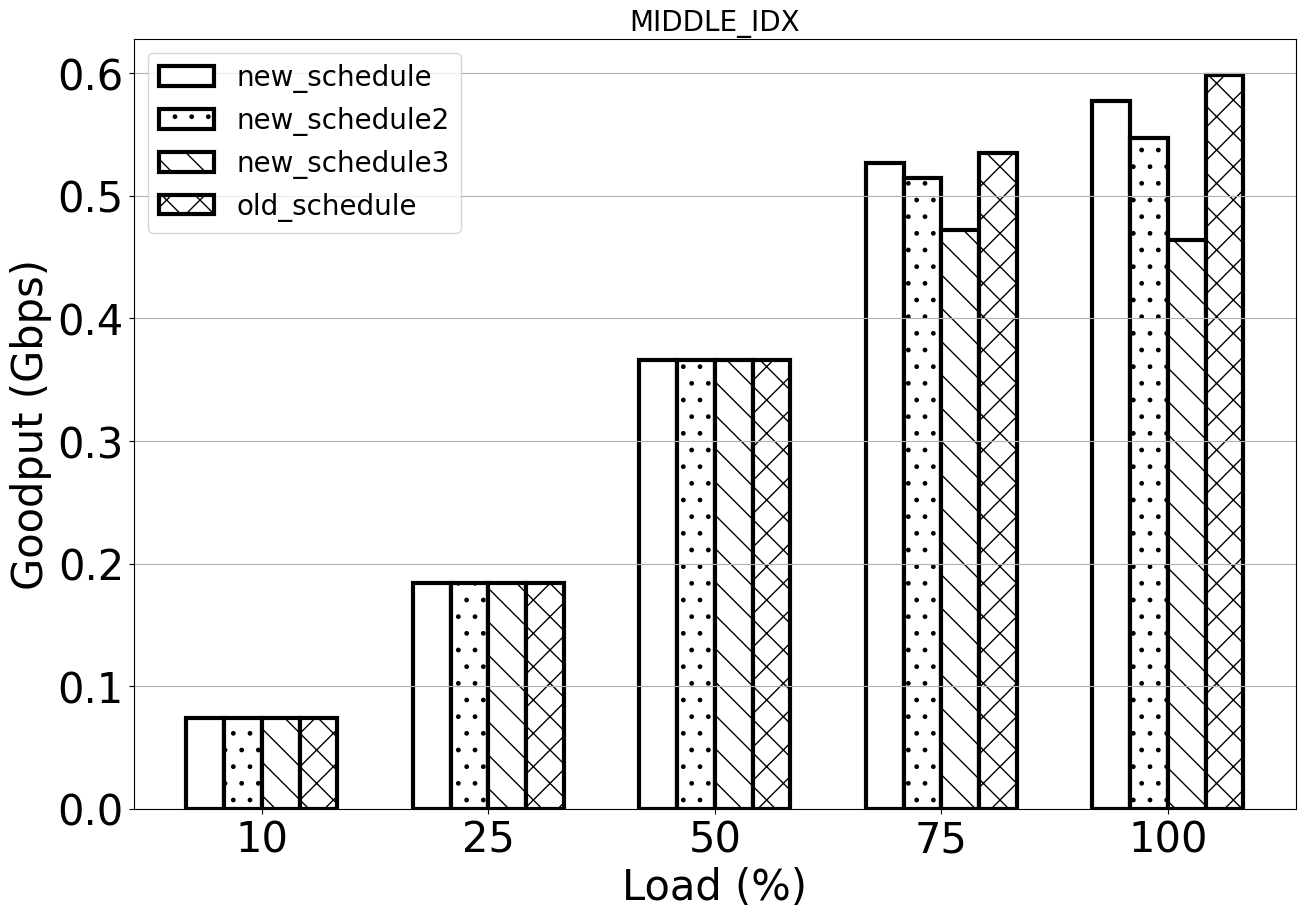

<Figure size 640x480 with 0 Axes>

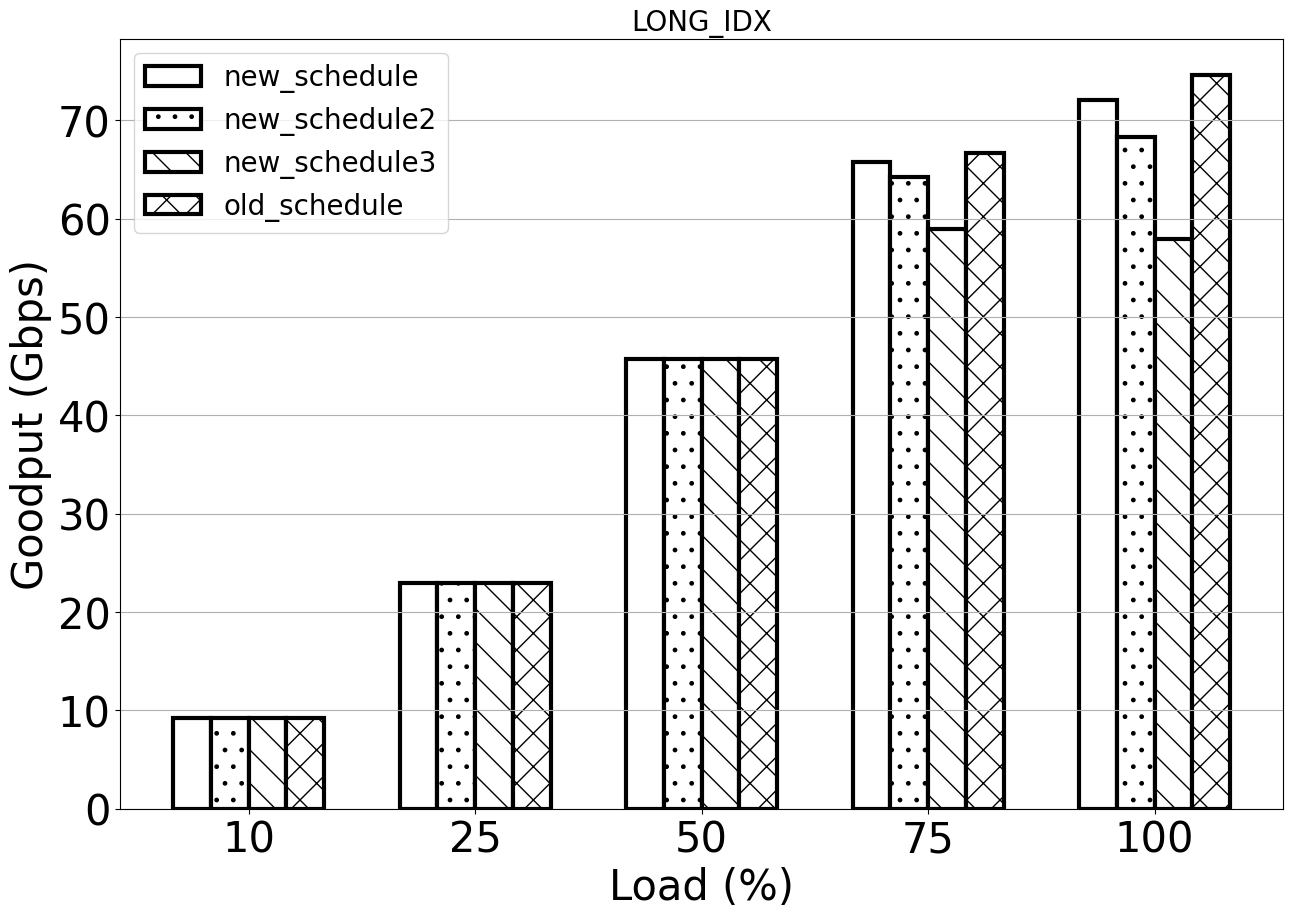

In [3]:
def goodput(labels, workload, flow_range='short'):

    results = {}
    results_long = {}
    for scheme in schemes:
        results[scheme] = []
        results_long[scheme] = []
        for workload in workloads:
            start_time = np.full(128, 100.0)
            end_time = np.full(128, 0.0)
            
            fct = data[scheme][workload]['FCT']
            for i in range(fct.shape[0]):
                if fct[i][6] < start_time[int(fct[i][3])]:
                    start_time[int(fct[i][3])] = fct[i][6]
                if fct[i][6] > end_time[int(fct[i][3])]:
                    end_time[int(fct[i][3])] = fct[i][6]
            # if flow_range == 'Mice':
            #     idx = data[scheme][workload]['SHORT_IDX']
            # elif flow_range == 'Elephant':
            #     idx = data[scheme][workload]['LONG_IDX']
            # elif flow_range == 'middle':
            #     idx = data[scheme][workload]['MIDDLE_IDX']
            # elif flow_range == 'all':
            #     idx = np.arange(len(data[scheme][workload]['FCT']))
            # print(workload)
            idx = data[scheme][workload][flow_range]
            fct = data[scheme][workload]['FCT'][idx, :] 

            # start_time = np.full(128, 100.0)
            # end_time = np.full(128, 0.0)
            received_bytes = np.full(128, 0.0)
            # print(fct_single.shape[0])
            # print(fct_multi.shape[0])
            for i in range(fct.shape[0]):
                received_bytes[int(fct[i][3])] += fct[i][4]
                # if fct_single[i][6] < start_time[int(fct_single[i][3])]:
                #     start_time[int(fct_single[i][3])] = fct_single[i][6]
                # if fct_single[i][6] > end_time[int(fct_single[i][3])]:
                #     end_time[int(fct_single[i][3])] = fct_single[i][6]
            # print(received_bytes)
            # print(received_bytes_long)
            results[scheme].append(np.mean(received_bytes * 8 / (end_time - start_time) / 1e9))

        



    print(results)


    # schemes_label = ['OST_2', 'OST_3', 'OST_4', 'OST_5', 'OST_6']
    # schemes_label = ['BPPN_250', 'BPPN_300', 'BPPN_350', 'BPPN_400',]
    # schemes_label = ['BPPN_50', 'BPPN_100', 'BPPN_150', 'BPPN_200', 'BPPN_250']
    # schemes_label = ['BPPN_10', 'BPPN_20', 'BPPN_30', 'BPPN_40', 'BPPN_50']
    schemes_label = schemes




    x_tick = np.arange(len(labels))*0.3 # the label locations
    x = x_tick - (len(schemes)-1)*WIDTH/2

    # fig, ax = plt.subplots(figsize=my_figsize)
    plt.figure()
    fig, ax = plt.subplots(figsize=my_figsize)
    ax.grid(axis='y')
    hatches = ["", ".", "\\", "x", "*", "|", "o"]
    colors = ["white", "white", "white", "white", "white", "white", "white"]
    for i, scheme in enumerate(schemes):
        # ax.bar(x + WIDTH*i, results[scheme][mode], WIDTH, label=scheme)
        # 一次画一个scheme的所有load的bar
        ax.bar(x + WIDTH*i, results[scheme], WIDTH, edgecolor="black", label=schemes_label[i], linewidth = 3, color=[colors[i]], hatch=hatches[i])
        

        # if mode == "Mean":
        #     ax.set_ylabel('Avg. FCT of ' + flow_range + " (ms)", fontsize=my_fontsize)
        # elif mode == "99p":
        #     ax.set_ylabel('99p FCT of ' + flow_range + " (ms)", fontsize=my_fontsize)
        # else:
        #     ax.set_ylabel('FCT of ' + flow_range + " (ms)", fontsize=my_fontsize)
        ax.set_ylabel('Goodput (Gbps)', fontsize=my_fontsize)

        # ax.set_xlabel("Incast Degree", fontsize=my_fontsize)
        # ax.set_title('Accelerate by adding line rate', fontsize=my_fontsize)
        ax.set_xlabel("Load (%)", fontsize=my_fontsize)
        ax.set_xticks(x_tick)

        plt.xticks(fontsize=my_fontsize)
        plt.yticks(fontsize=my_fontsize)


        ax.set_xticklabels(labels, fontsize=my_fontsize)

        # scientific_formatter = FuncFormatter(scientific)
        # ax.yaxis.set_major_formatter(scientific_formatter)
        # ax.yaxis.set_minor_formatter(mticker.ScalarFormatter())

        # ax.set_yscale('log')
        ax.ticklabel_format( style='plain', axis='y')

        # ax.set_yscale('log')

        # ax.set_ylim([0.0001,1000])
        ax.legend(ncol=1, loc = "upper left", fontsize=20)
        # ax.set_yscale('log')
        # ax.legend(ncol=2, loc = "upper left", fontsize=my_fontsize-2, handlelength=1.5, borderpad = 0.2, labelspacing = 0.3, columnspacing = 1.0)
        ax.set_title(flow_range, fontsize=20)
        figure_path = '../FIGS/Zeropod/split goodput.pdf'
        # plt.savefig(figure_path, dpi=300, bbox_inches='tight')

goodput(labels, workloads, 'SHORT_IDX')
goodput(labels, workloads, 'MIDDLE_IDX')
goodput(labels, workloads, 'LONG_IDX')

{'new_schedule': [1.1281615373752945, 0.7568612934855808, 0.4086982303359494, 0.29718490947986315, 0.4545598766537589], 'new_schedule2': [1.1282323661753793, 0.8149533792099553, 0.4116313536137097, 0.3265492221351114, 0.5172510627676004], 'new_schedule3': [0.03770349870490624, 0.050778897308087885, 0.06043115227928754, 0.7659316090732008, 2.6543286415040095], 'old_schedule': [1.1834273748786954, 1.3982199216230555, 1.7647825869406553, 1.149849085236988, 1.6027544560273508]}
{'new_schedule': [1.6095285709803862, 1.948544214142499, 3.104222748030932, 6.680595961106189, 12.033826441589985], 'new_schedule2': [1.6484739945068805, 2.295231316547764, 4.434556960184764, 13.14087544304015, 35.43841975157342], 'new_schedule3': [1.697198719132013, 2.134851744628359, 4.612364071825716, 32.348597341266846, 103.28079348961022], 'old_schedule': [1.77852096574739, 2.2406058549420895, 3.9071119136496955, 7.164738593828097, 12.491325250843861]}


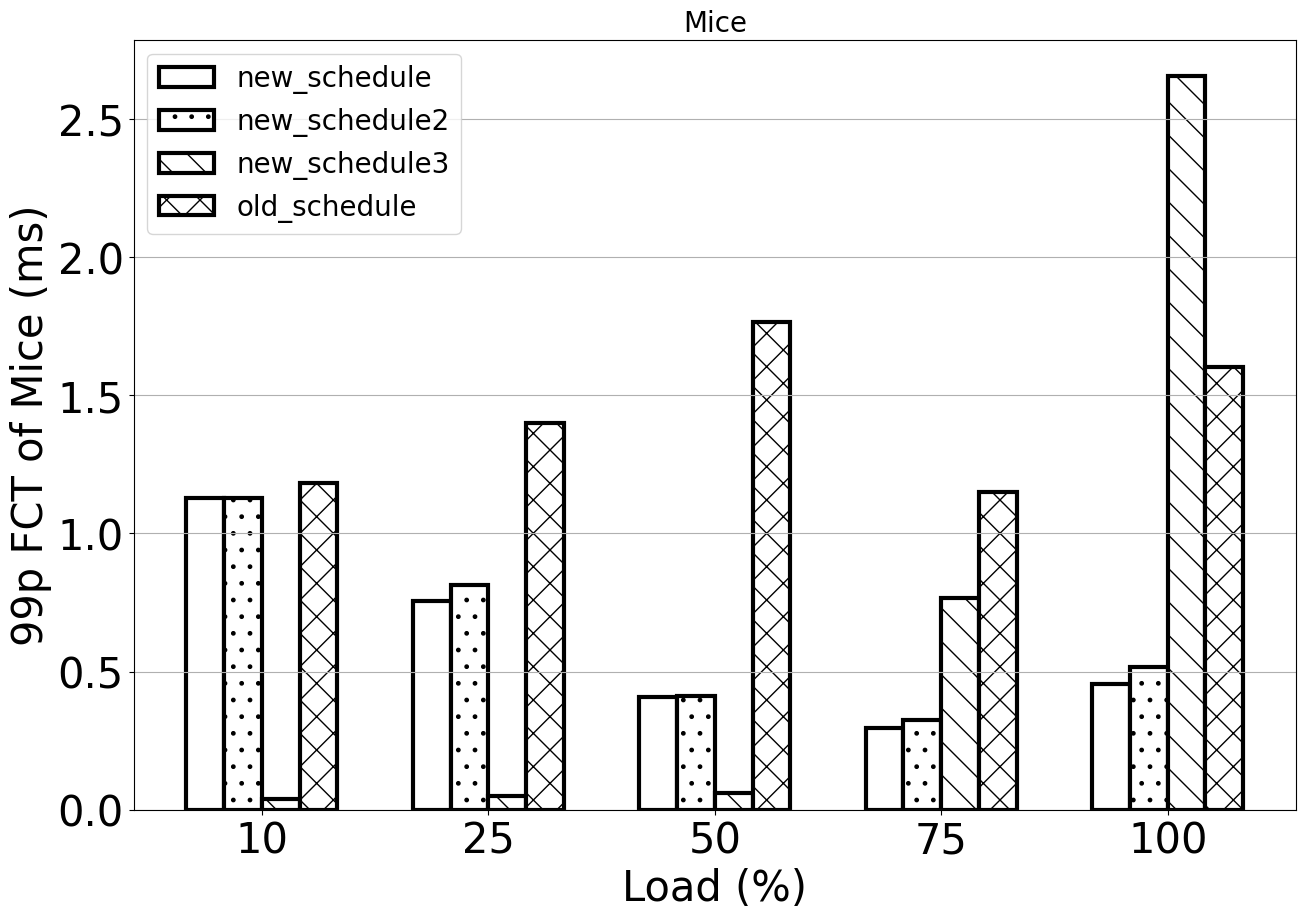

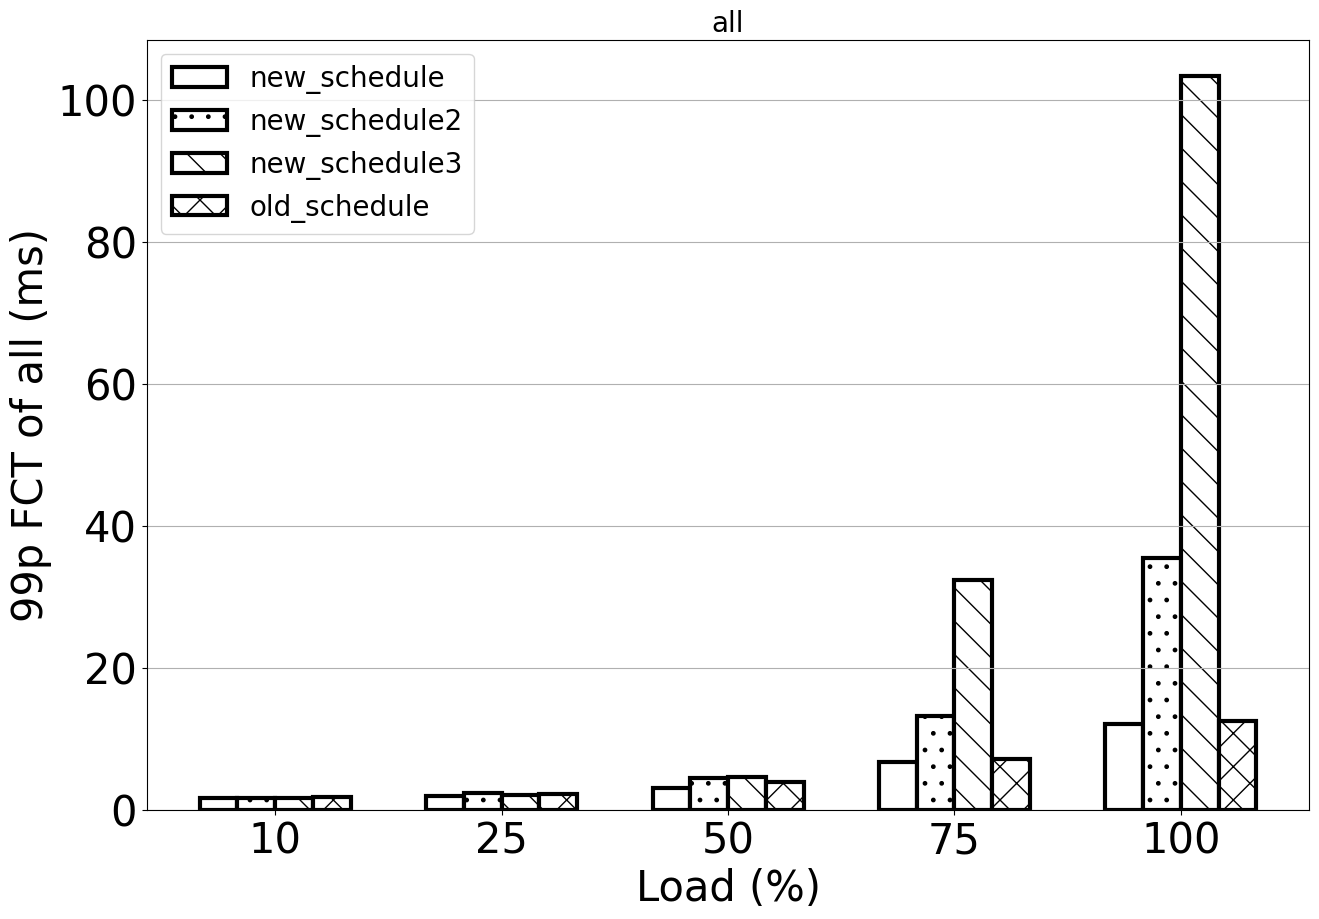

In [4]:
def fct_bar_plot(mode, labels, workload, flow_range='all'):

    results = {}
    for scheme in schemes:
        results[scheme] = []
        for workload in workloads:
            if flow_range == 'Mice':
                idx = data[scheme][workload]['SHORT_IDX']
            elif flow_range == 'Elephant':
                idx = data[scheme][workload]['LONG_IDX']
            elif flow_range == 'middle':
                idx = data[scheme][workload]['MIDDLE_IDX']
            elif flow_range == 'all':
                idx = np.arange(len(data[scheme][workload]['FCT']))

            # available_idx = data[scheme][workload]['FCT'][:, 7] > 0 # 过滤未完成的流
            idx_xx = data[scheme][workload]['multipods']
            # idx_xx = data[scheme][workload]['singlepod']
            idx = idx * idx_xx

            fct = data[scheme][workload]['FCT'][idx, 7] # fct

            if mode == 'Mean':
                results[scheme].append(np.mean(fct) * 1e3)
            elif mode == 'Median':
                results[scheme].append(np.percentile(fct, 50) * 1e3)
            elif mode == '99p':
                results[scheme].append(np.percentile(fct, 99) * 1e3)



    print(results)


    # schemes_label = ['OST_2', 'OST_3', 'OST_4', 'OST_5', 'OST_6']
    # schemes_label = ['BPPN_250', 'BPPN_300', 'BPPN_350', 'BPPN_400',]
    schemes_label = ['BPPN_50', 'BPPN_100', 'BPPN_150', 'BPPN_200', 'BPPN_250']
    schemes_label = ['BPPN_10', 'BPPN_20', 'BPPN_30', 'BPPN_40', 'BPPN_50']
    schemes_label = schemes




    x_tick = np.arange(len(labels))*0.3 # the label locations
    x = x_tick - (len(schemes)-1)*WIDTH/2

    # fig, ax = plt.subplots(figsize=my_figsize)
    fig, ax = plt.subplots(figsize=my_figsize)
    ax.grid(axis='y')
    hatches = ["", ".", "\\", "x", "*", "|", "o"]
    colors = ["white", "white", "white", "white", "white", "white", "white"]
    for i, scheme in enumerate(schemes):
        # ax.bar(x + WIDTH*i, results[scheme][mode], WIDTH, label=scheme)
        # 一次画一个scheme的所有load的bar
        ax.bar(x + WIDTH*i, results[scheme], WIDTH, edgecolor="black", label=schemes_label[i], linewidth = 3, color=[colors[i]], hatch=hatches[i])


        

        if mode == "Mean":
            ax.set_ylabel('Avg. FCT of ' + flow_range + " (ms)", fontsize=my_fontsize)
        elif mode == "99p":
            ax.set_ylabel('99p FCT of ' + flow_range + " (ms)", fontsize=my_fontsize)
        else:
            ax.set_ylabel('FCT of ' + flow_range + " (ms)", fontsize=my_fontsize)
        # ax.set_xlabel("Incast Degree", fontsize=my_fontsize)
        # ax.set_title('Accelerate by adding line rate', fontsize=my_fontsize)
        ax.set_xlabel("Load (%)", fontsize=my_fontsize)
        ax.set_xticks(x_tick)

        plt.xticks(fontsize=my_fontsize)
        plt.yticks(fontsize=my_fontsize)


        ax.set_xticklabels(labels, fontsize=my_fontsize)

        # scientific_formatter = FuncFormatter(scientific)
        # ax.yaxis.set_major_formatter(scientific_formatter)
        # ax.yaxis.set_minor_formatter(mticker.ScalarFormatter())

        # ax.set_yscale('log')
        ax.ticklabel_format( style='plain', axis='y')

        # ax.set_yscale('log')

        # ax.set_ylim([0.0001,1000])
        ax.legend(ncol=1, loc = "upper left", fontsize=20)
        # ax.set_title("Single pod", fontsize=20)
        ax.set_title(flow_range, fontsize=20)
        # ax.set_yscale('log')
        # ax.legend(ncol=2, loc = "upper left", fontsize=my_fontsize-2, handlelength=1.5, borderpad = 0.2, labelspacing = 0.3, columnspacing = 1.0)

        figure_path = '../FIGS/Zeropod/comparison_fct_' + flow_range + '1.pdf'
        plt.savefig(figure_path, dpi=300, bbox_inches='tight')

fct_bar_plot("99p", labels, workloads, flow_range='Mice')
fct_bar_plot("99p", labels, workloads, flow_range='all')